In [4]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results

ckpt_dir = 'abl6_stmnist_memory_sl5'

def plot_boxplots(df):
    sns.set_theme(style="whitegrid")
    # Create the boxplot with customizations
    
    boxplot = sns.boxplot(data=df, palette="Set3")  # Use a color palette to add color

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10, color='darkred')

    # Add a grid with custom style
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Optional: Show median labels on each box
    for i, patch in enumerate(boxplot.artists):
        median_val = df.iloc[:, i].median()
        boxplot.text(i, median_val + 0.5, f'{median_val:.1f}%', ha='center', color='black', fontsize=10)

    return plt.gca()

def plot_boxes(folder):

    ckpt_dir = folder


    # delays
    sweep_params_names = {
        'connection_type': ['f'],
        'delay': ['dc'],
        'structure':['2l'],
        'tau_m':['hm', 'ht'],
        'T_freeze_taus':['ft', 'tt']
        }

    # recurrent
    sweep_params_names2 = {
        'connection_type': ['r'],
        'delay': ['nd'],
        'structure':['2l'],
        'tau_m':['hm', 'ht'],
        'T_freeze_taus':['ft', 'tt']
        }

    # feedforward 4l
    sweep_params_names3 = {
        'connection_type': ['f'],
        'delay': ['nd'],
        'structure':['4l'],
        'tau_m':['hm', 'ht'],
        'T_freeze_taus':['ft', 'tt']
        }

    # feedforward 2l
    sweep_params_names4 = {
        'connection_type': ['f'],
        'delay': ['nd'],
        'structure':['2l'],
        'tau_m':['hm', 'ht'],
        'T_freeze_taus':['ft', 'tt']
        }

    sweep_params_names3 = {
        'connection_type': ['f'],
        'delay': ['nd'],
        'structure':['4l'],
        'tau_m':['hm', 'ht'],
        'T_freeze_taus':['ft', 'tt']
        }

    acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=1)
    _, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=1, mode='last')

    acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=1)
    _, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=1, mode='last')

    acc_f4, spk_f4, spkt_f4, _, _, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=1)
    _, _, _, trnloss_f4, tstloss_f4, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=1, mode='last')

    df_acc = pd.DataFrame(acc_d | acc_r | acc_f4)
    df_spk = pd.DataFrame(spk_d | spk_r | spk_f4)
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_boxplots(df_acc)
    plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
    plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
    plt.subplot(122)
    plot_boxplots(df_spk)
    plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
    plt.ylabel("Spikes per neuron per timestep", fontsize=12, color='darkgreen')

0.0022223626729100943, 0.028437500819563866%
0.002920872299000621, 0.023193359375%
0.0036598520819097757, 0.031982421875%
0.0035193990916013718, 0.025634765625%
0.0056574419140815735, 0.046875%


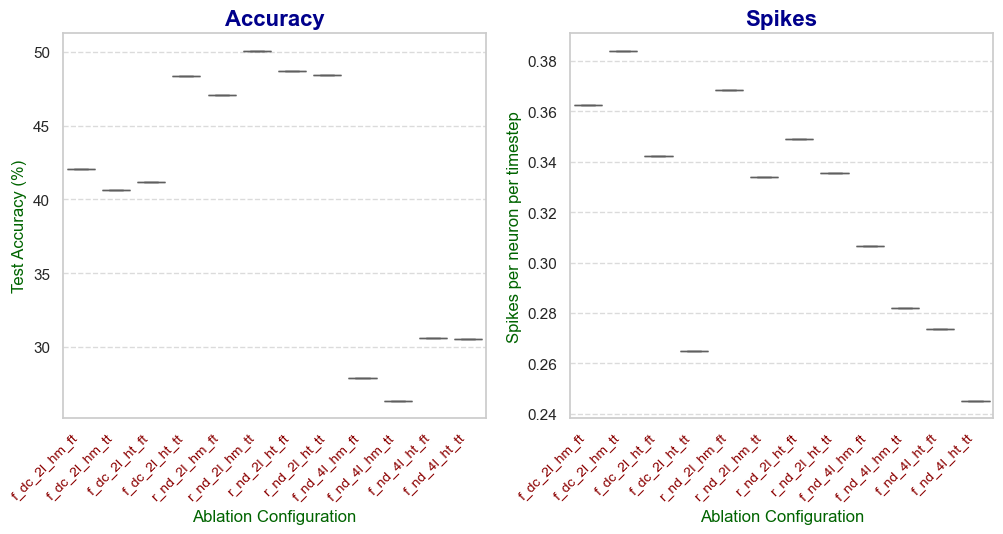

In [5]:
plot_boxes('abl6_stmnist_memory_sl5')

0.002057386329397559, 0.025546874850988388%
0.00296546658501029, 0.02392578125%
0.0032005226239562035, 0.02197265625%
0.0037606102414429188, 0.02783203125%
0.0036476771347224712, 0.02083333395421505%


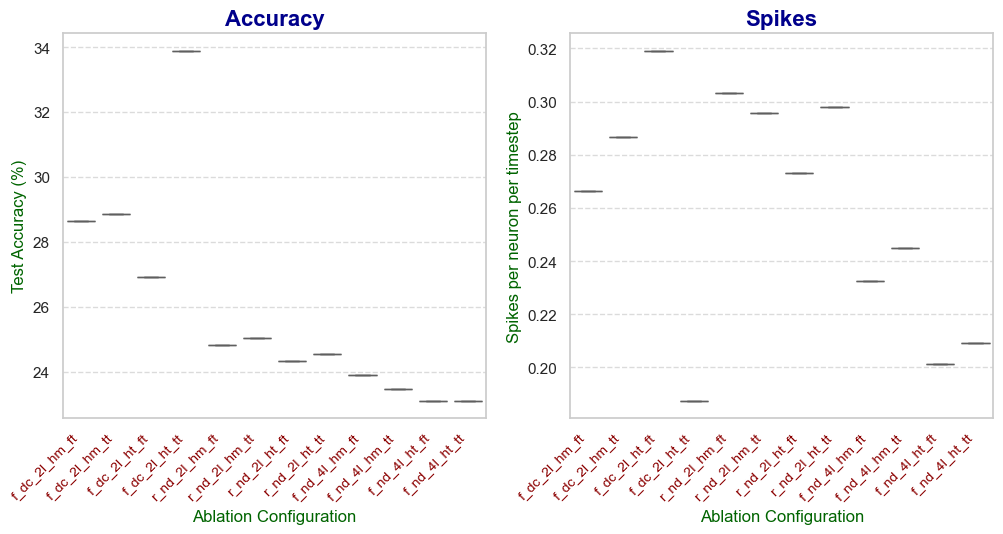

In [6]:
plot_boxes('abl6_stmnist_memory_sl10')

0.0020549395121634007, 0.023906249552965164%
0.0027855730149894953, 0.020751953125%
0.003524437081068754, 0.02197265625%
0.003577792551368475, 0.02880859375%
0.0038344936911016703, 0.01215277798473835%


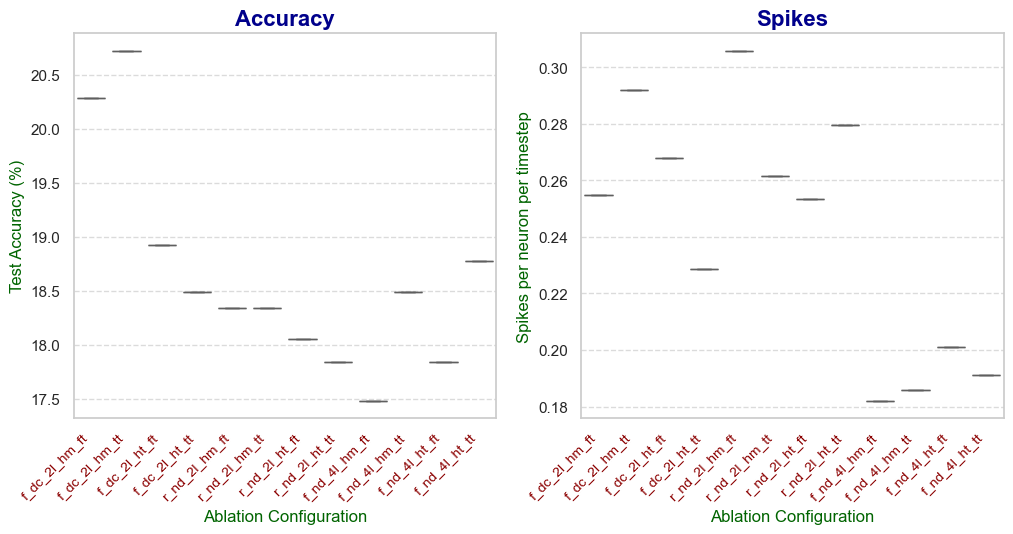

In [7]:
plot_boxes('abl6_stmnist_memory_sl20')